# Quantization in deep learning | Deep Learning Tutorial 49 (Tensorflow, Keras & Python)
Are you planning to deploy a **deep learning** model on any **edge device (like: microcontrollers, cell phone or wearable device)?** You need to optimize or downsize your huge model so that you can run the model efficiently in low resource environment. **Quantization** is the technique that let's you do that. In this video we will cover topics outlined below,

Code: https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/49_quantization/quantization.ipynb <br>
Credit: https://www.youtube.com/watch?v=v1oHf1KV6kM&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=49
#### Owner: Codebasics

**Quantization** for **_deep learning_** is the process of approximating a **neural network** that uses <u>_floating-point numbers by a neural network of low bit width numbers._</u> This dramatically reduces both the __memory requirement__ and __computational cost__ of using **neural networks.**

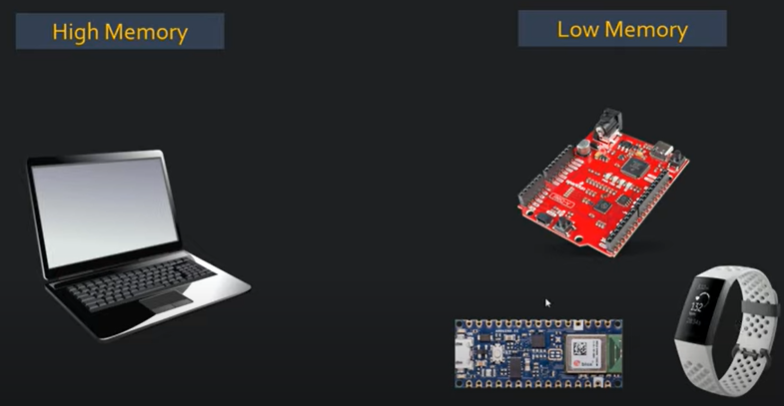

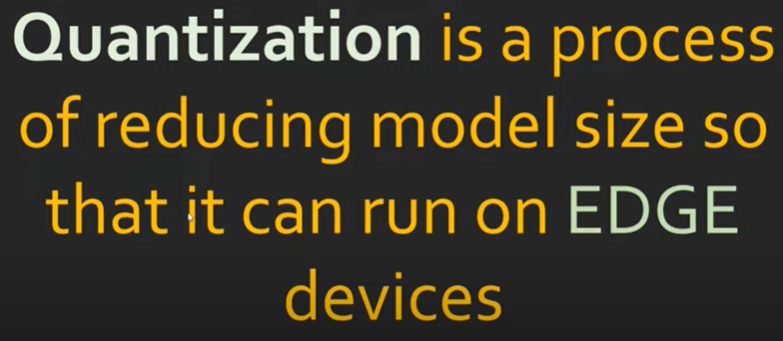

# Neural network with float
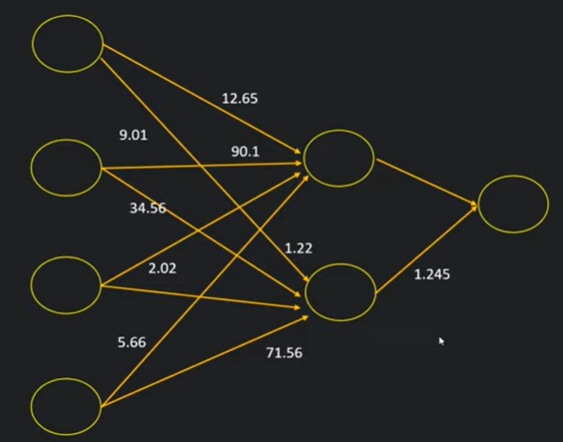

# Four byte of float to be convert into one byte of integer
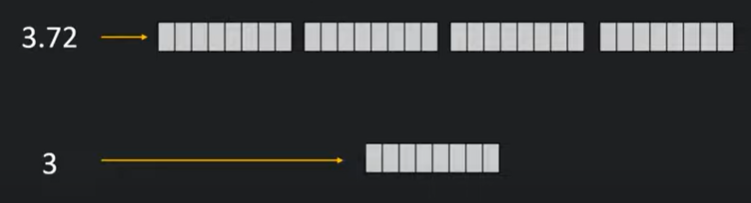

# Quantization conversion from float to integer
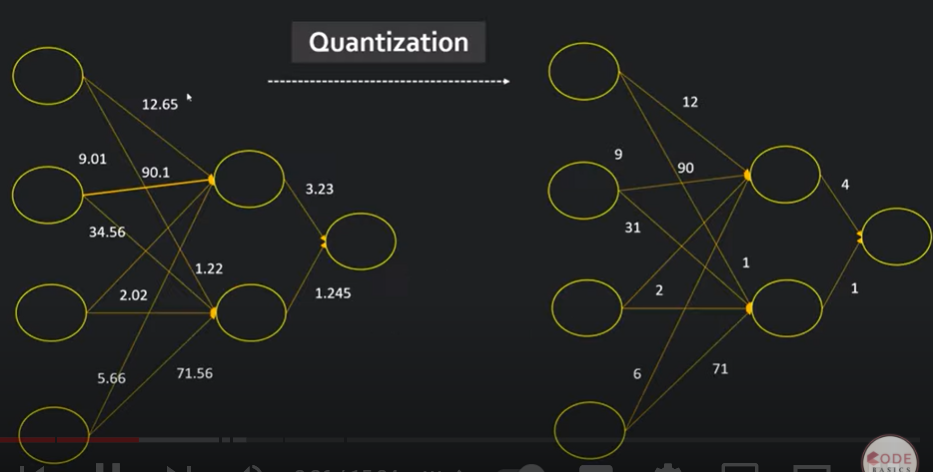

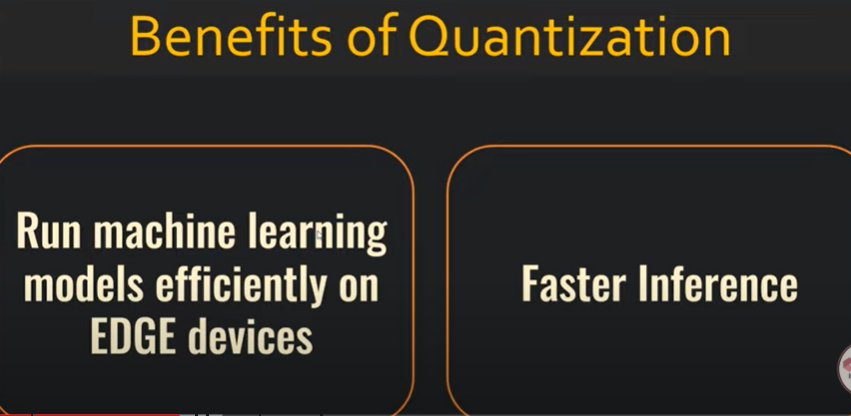

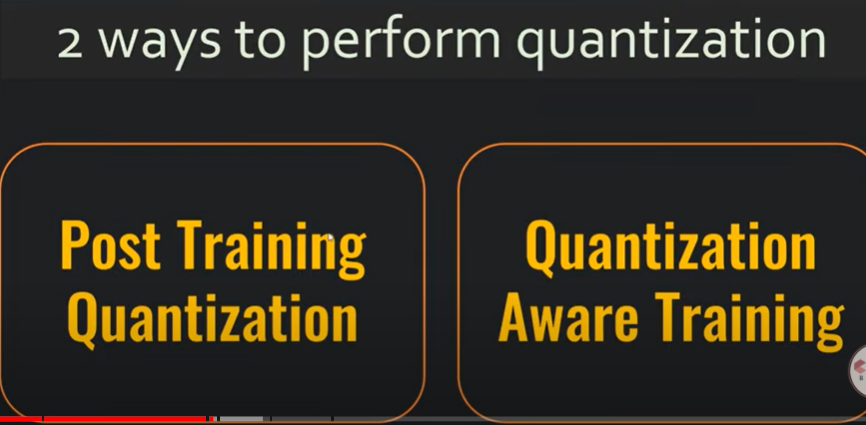

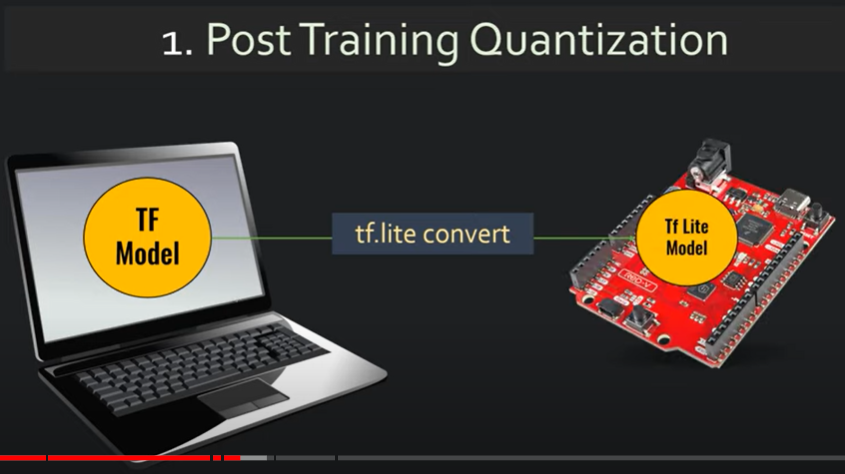

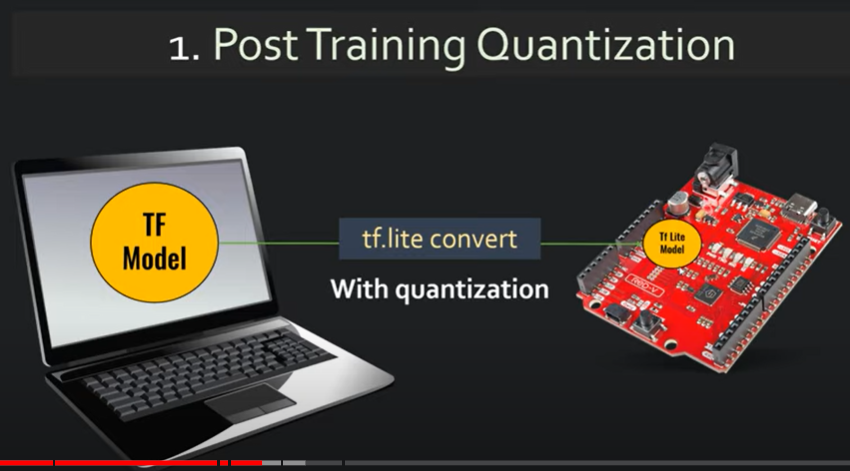

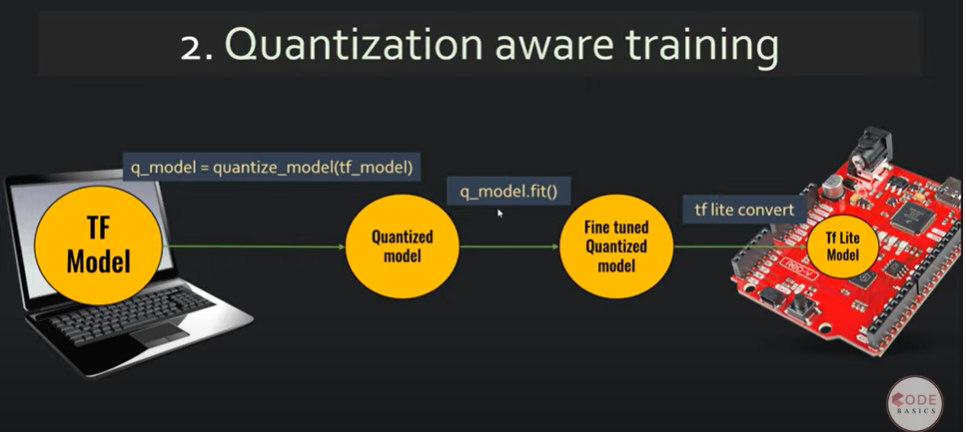

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# (training dataset input, output), (testing dataset input, output)
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train) # input length of training dataset

60000

In [4]:
len(X_test) # input length of test dataset

10000

In [5]:
len(y_train) # output length of training dataset

60000

In [6]:
len(y_test) # output length of test dataset

10000

In [7]:
X_train.shape[0] # length of single vector in input dataset, will give same 60K

60000

In [8]:
X_train[0].shape # shape of each training dataset

(28, 28)

In [9]:
X_train.shape # matrix of entire input training dataset shape and shape of each

(60000, 28, 28)

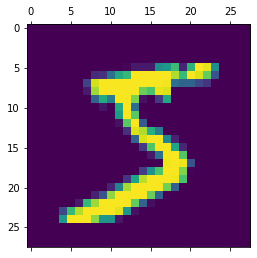

In [10]:
plt.matshow(X_train[0]) # visualize the image of single dataset, pixel of 28 x 28

In [11]:
y_train[0] # verify the same with output dataset

5

In [12]:
# Normalize / Scale the input image so that each pixel value is between 0 to 1, since each pixel is of 256 (o to 255)
X_train = X_train / 255
X_test = X_test / 255

In [13]:
# Flatten the training & testing matrix of dataset (multi-dimensional array) into a one dimension array
X_train_flattened = X_train.reshape(len(X_train), 28 * 28) # 28 x 28 = 784
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)

In [14]:
X_train_flattened.shape

(60000, 784)

## Deployment of <font color='blue'>keras model</color> on training & test dataset

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),# Flatten the training & testing dataset (multi-dimensional array) into a single dimension array
    keras.layers.Dense(100, activation='relu'),# apply activation function 'Rectified Linear Unit-ReLU' on 100 hidden layer 
    keras.layers.Dense(10, activation='sigmoid')# apply activation function Sigmoid on 10 (0 to 9) output layer
])

# Compile the model
# entropy, is one of the way to understand and measure,the impurity/uncertainity/randomness/ in the data.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# finally train the model
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2722 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1234 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0859 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0666 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0520 - accuracy: 0.9841


In [16]:
# len(model) # TypeError: object of type 'Sequential' has no len()

In [17]:
len(model.weights)
# Weights control the signal (or the strength of the connection) between two neurons. 
# In other words, a weight decides how much influence the input will have on the output.

4

In [18]:
model.evaluate(X_test, y_test) # return the loss and accuracy of the model

313/313 [==============================] - 1s 1ms/step - loss: 0.0808 - accuracy: 0.9747


[0.08075088262557983, 0.9746999740600586]

In [19]:
model.save("./saved_model") # export the model to the disk, in order to check the size of model

INFO:tensorflow:Assets written to: ./saved_model\assets


## 1 Post-training quantization
**Post-training quantization** includes general techniques to _reduce CPU and hardware accelerator latency, processing, power, and model size with little degradation in model accuracy._ These techniques can be performed on an already-trained float **TensorFlow model** and applied during **TensorFlow Lite conversion.**

#### without quantization

In [20]:
# let's convert the already-trained & saved float TensorFlow model into TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model")
tflite_model = converter.convert()

In [21]:
len(tflite_model) # 319,776 bytes (319 KB), it is coming from "./saved_model" of size ~ 1 MB

319776

### let's get the quantized model
#### with quantization

In [22]:
# converting an un-quantized trained & saved model, into the quantized one, using tensorflow tflite
converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model")
converter.optimizations = [tf.lite.Optimize.DEFAULT] # apply the quantization optimization
tflite_quant_model = converter.convert()

In [23]:
len(tflite_quant_model) # 84,720 bytes (84 KB); this is almost 4 times less than without quantized model size

84720

In [24]:
# tflite_quant_model.summary() # AttributeError: 'bytes' object has no attribute 'summary'

### save above both the models in files

In [25]:
with open("tflite_model.tflite", "wb") as f:
    f.write(tflite_model)

In [26]:
len(tflite_model)

319776

In [27]:
with open("tflite_quant_model.tflite", "wb") as f:
    f.write(tflite_quant_model)

In [28]:
len(tflite_quant_model)

84720

## 2 Quantization aware training
**Quantization aware training** emulates inference-time quantization, creating a model that downstream tools will use to produce actually quantized models. The quantized models use lower-precision (e.g. 8-bit instead of 32-bit float), leading to benefits during deployment.

### here, again need to train & compile the model

In [29]:
import tensorflow_model_optimization as tfmot

# Quantize a `tf.keras` model with the default quantization implementation.
quantize_model = tfmot.quantization.keras.quantize_model

# Creation of quantization aware training model
q_aware_model = quantize_model(model) # working with un-quantized model

# Compilation of quantization aware training model 
q_aware_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
q_aware_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer (QuantizeLay  (None, 28, 28)           3         
 er)                                                             
                                                                 
 quant_flatten (QuantizeWrap  (None, 784)              1         
 perV2)                                                          
                                                                 
 quant_dense (QuantizeWrappe  (None, 100)              78505     
 rV2)                                                            
                                                                 
 quant_dense_1 (QuantizeWrap  (None, 10)               1015      
 perV2)                                                          
                                                                 
Total params: 79,524
Trainable params: 79,510
Non-traina

In [30]:
q_aware_model.fit(X_train, y_train, epochs=5) # training the quantization aware training model

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0445 - accuracy: 0.9862
Epoch 2/5
1875/1875 [==============================] - ETA: 0s - loss: 0.0352 - accuracy: 0.98 - 4s 2ms/step - loss: 0.0356 - accuracy: 0.9888
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0292 - accuracy: 0.9906
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0231 - accuracy: 0.9929
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0197 - accuracy: 0.9936


In [31]:
q_aware_model.evaluate(X_test, y_test) # evaluation of the quantization aware training model, for loss & accuracy

313/313 [==============================] - 1s 1ms/step - loss: 0.0785 - accuracy: 0.9789


[0.0785214751958847, 0.9789000153541565]

In [32]:
# converting a quantized aware trained model, using keras, tensorflow & tflite
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_qaware_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\39762\AppData\Local\Temp\tmpkyk0hwez\assets


INFO:tensorflow:Assets written to: C:\Users\39762\AppData\Local\Temp\tmpkyk0hwez\assets


In [33]:
# save the model
with open("tflite_qaware_model.tflite", 'wb') as f:
    f.write(tflite_qaware_model)